In [133]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [134]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [135]:
NUM_CLASSES = 9

# 学習データ読み込み

In [136]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [137]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [139]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [140]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
# Update the model_save_path to use .keras extension
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"

# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False
)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [142]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [143]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
23/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1718 - loss: 2.1276
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1812 - loss: 2.1080 - val_accuracy: 0.3337 - val_loss: 1.9078
Epoch 2/1000
32/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2709 - loss: 1.9412 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2756 - loss: 1.9340 - val_accuracy: 0.3905 - val_loss: 1.7528
Epoch 3/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2812 - loss: 1.8779
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3203 - loss: 1.8088 - val_accuracy: 0.4523 - val_loss: 1.6431
Epoch 4/1000
34/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3488 - loss: 1.7555 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


In [144]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9254 - loss: 0.3780 


In [145]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [146]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[1.1380884e-04 9.6712106e-01 3.2748934e-02 1.2374260e-05 3.8332023e-06
 2.4066298e-12 6.6468014e-10 7.8251468e-12 1.8022744e-10]
1


# 混同行列

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


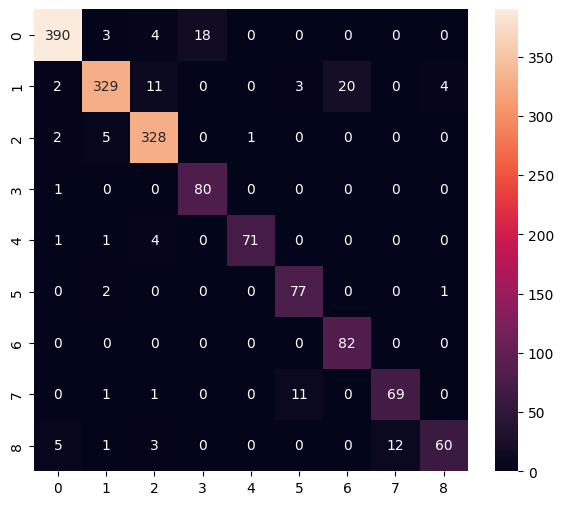

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       415
           1       0.96      0.89      0.93       369
           2       0.93      0.98      0.95       336
           3       0.82      0.99      0.89        81
           4       0.99      0.92      0.95        77
           5       0.85      0.96      0.90        80
           6       0.80      1.00      0.89        82
           7       0.85      0.84      0.85        82
           8       0.92      0.74      0.82        81

    accuracy                           0.93      1603
   macro avg       0.90      0.92      0.90      1603
weighted avg       0.93      0.93      0.93      1603



In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [148]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [149]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\tirth\AppData\Local\Temp\tmperccm8fg\assets


INFO:tensorflow:Assets written to: C:\Users\tirth\AppData\Local\Temp\tmperccm8fg\assets


Saved artifact at 'C:\Users\tirth\AppData\Local\Temp\tmperccm8fg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  1726665813136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1726665807184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1726665813328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1726665809296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1726665806416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1726667738960: TensorSpec(shape=(), dtype=tf.resource, name=None)


6776

# 推論テスト

In [150]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [151]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [152]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [153]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [154]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.13808732e-04 9.67121065e-01 3.27489339e-02 1.23742475e-05
 3.83320594e-06 2.40662525e-12 6.64678812e-10 7.82510168e-12
 1.80226750e-10]
1
